In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#učitavanje svih neophodnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures#za potrebe normalizacije obelezja, a drugo je kombinovanje obelezja
from sklearn.linear_model import LinearRegression, Ridge, Lasso#dva druga se bave regularizacijom
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [ ]:
#ucitavanje podataka u DataFrame
data=pd.read_csv('drive/MyDrive/GuangzhouPM20100101_20151231.csv');
data.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [ ]:
print('broj uzoraka:', data.shape[0])
print('broj obelezja:', data.shape[1])
print('obelezja: ',data.dtypes)

broj uzoraka: 52584
broj obelezja: 17
obelezja:  No                        int64
year                      int64
month                     int64
day                       int64
hour                      int64
season                  float64
PM_City Station         float64
PM_5th Middle School    float64
PM_US Post              float64
DEWP                    float64
HUMI                    float64
PRES                    float64
TEMP                    float64
cbwd                     object
Iws                     float64
precipitation           float64
Iprec                   float64
dtype: object


In [ ]:
print("godine koje se pojavljuju su: ",data['year'].unique())
print("meseci koji se pojavljuju su: ",data['month'].unique())
print("dani koje se pojavljuju su: ",data['day'].unique())
print("sati koje se pojavljuju su: ",data['hour'].unique())
print("sezone koje se pojavljuju su: ",data['season'].unique())
print("moguce vrednosti za obelezje pravac vetra (cbdw) su:",data['cbwd'].unique())
#sva ova prethodno navedena obelezja su kategoricka

godine koje se pojavljuju su:  [2010 2011 2012 2013 2014 2015]
meseci koji se pojavljuju su:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
dani koje se pojavljuju su:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
sati koje se pojavljuju su:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
sezone koje se pojavljuju su:  [ 4.  1.  2.  3. nan]
moguce vrednosti za obelezje pravac vetra (cbdw) su: ['NW' 'cv' 'NE' 'SE' 'SW' nan]


In [ ]:
#provera nedostajucih podataka
print(data.isna().sum())
#vidi se da za dosta uzoraka postoji jedna null vrednost, treba ispitati da li se radi o jednom uzorku ili vise njih
print("procentualni uvid u nedostajuce podatke")
print(data.isna().sum()/len(data))

No                          0
year                        0
month                       0
day                         0
hour                        0
season                      1
PM_City Station         20232
PM_5th Middle School    31489
PM_US Post              20232
DEWP                        1
HUMI                        1
PRES                        1
TEMP                        1
cbwd                        1
Iws                         1
precipitation               1
Iprec                       1
dtype: int64
procentualni uvid u nedostajuce podatke
No                      0.000000
year                    0.000000
month                   0.000000
day                     0.000000
hour                    0.000000
season                  0.000019
PM_City Station         0.384756
PM_5th Middle School    0.598832
PM_US Post              0.384756
DEWP                    0.000019
HUMI                    0.000019
PRES                    0.000019
TEMP                    0.000019
cbwd    

In [ ]:
data.drop(['PM_City Station','PM_5th Middle School','No'],axis=1,inplace=True)

In [ ]:
data.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4.0,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2010,1,1,1,4.0,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,2010,1,1,2,4.0,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,2010,1,1,3,4.0,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,2010,1,1,4,4.0,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [ ]:
data_null_season = data[data['season'].isna()]
data_null_season
#vidi se da je jedan uzorak koji ima za većinu obeležja null vrednost i zato ga treba izbaciti iz skupa podataka

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
52583,2015,12,31,23,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.drop(52583,axis=0, inplace=True)

In [ ]:
#npr ako je cilj da se analizira stanje po godina, izbaciće se godine kojima nedostaje više od 30% podataka za obeležje PM
#zato cu sada detektovati koje su to godine
#onda će se te godine izbrisati iz baze 
gb=data.groupby(by='year').count()
del_year=[]
for i in data['year'].unique():
  if gb.loc[i,'PM_US Post']/gb.loc[i,'month']<0.7:
    del_year.append(i)
print(del_year)
gb

[2010, 2011]


,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year,,,,,,,,,,,,,
2010,8760,8760,8760,8760,0,8760,8760,8760,8760,8760,8760,8760,8760
2011,8760,8760,8760,8760,897,8760,8760,8760,8760,8760,8760,8760,8760
2012,8784,8784,8784,8784,6492,8784,8784,8784,8784,8784,8784,8784,8784
2013,8760,8760,8760,8760,8370,8760,8760,8760,8760,8760,8760,8760,8760
2014,8760,8760,8760,8760,8077,8760,8760,8760,8760,8760,8760,8760,8760
2015,8759,8759,8759,8759,8515,8759,8759,8759,8759,8759,8759,8759,8759


In [ ]:
print('Broj uzoraka i obelezja pre brisanja: ', data.shape)
print('Broj jedinstvenih godina pre brisanja: ', len(data['year'].unique()))
data_without_some_year = data[~data['year'].isin(del_year)]

print('Broj uzoraka i obelezja posle brisanja: ', data_without_some_year.shape)
print('Broj jedinstvenih godina posle brisanja: ', len(data_without_some_year['year'].unique()))

Broj uzoraka i obelezja pre brisanja:  (52583, 14)
Broj jedinstvenih godina pre brisanja:  6
Broj uzoraka i obelezja posle brisanja:  (35063, 14)
Broj jedinstvenih godina posle brisanja:  4


In [ ]:
data_without_some_year.head()
#nedostajuće vrednosti za obeležje PM2.5 zameniću sa prosekom vrednosti za prethodni ili naredni sat
print('Broj uzoraka i obelezja: ', data_without_some_year.shape)
data_without_some_year.isna().sum()

Broj uzoraka i obelezja:  (35063, 14)


year                0
month               0
day                 0
hour                0
season              0
PM_US Post       3609
DEWP                0
HUMI                0
PRES                0
TEMP                0
cbwd                0
Iws                 0
precipitation       0
Iprec               0
dtype: int64

In [ ]:
data_without_some_year.reset_index(inplace=True)
data_without_some_year

,index,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,17520,2012,1,1,0,4.0,84.0,9.1,73.0,1015.500000,13.9,NE,9.4,0.0,0.0
1,17521,2012,1,1,1,4.0,81.0,9.1,74.0,1015.400000,13.6,NE,12.4,0.0,0.0
2,17522,2012,1,1,2,4.0,72.0,8.9,79.0,1015.400000,12.4,NE,16.6,0.0,0.0
3,17523,2012,1,1,3,4.0,80.0,8.4,79.0,1015.500000,11.9,NE,18.0,0.0,0.0
4,17524,2012,1,1,4,4.0,69.0,8.1,81.0,1015.300000,11.2,NE,20.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,52578,2015,12,31,18,4.0,52.0,10.1,68.0,1017.700012,16.0,NW,9.5,0.0,0.0
35059,52579,2015,12,31,19,4.0,59.0,11.0,80.0,1018.299988,14.4,NW,10.9,0.0,0.0
35060,52580,2015,12,31,20,4.0,58.0,11.4,82.0,1018.700012,14.5,NW,12.9,0.0,0.0
35061,52581,2015,12,31,21,4.0,60.0,11.1,78.0,1019.300000,14.9,NW,14.7,0.0,0.0


In [ ]:
data_without_some_year.drop('index',axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_without_some_year.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,1,1,0,4.0,84.0,9.1,73.0,1015.5,13.9,NE,9.4,0.0,0.0
1,2012,1,1,1,4.0,81.0,9.1,74.0,1015.4,13.6,NE,12.4,0.0,0.0
2,2012,1,1,2,4.0,72.0,8.9,79.0,1015.4,12.4,NE,16.6,0.0,0.0
3,2012,1,1,3,4.0,80.0,8.4,79.0,1015.5,11.9,NE,18.0,0.0,0.0
4,2012,1,1,4,4.0,69.0,8.1,81.0,1015.3,11.2,NE,20.4,0.0,0.0


In [ ]:
data_without_some_year['PM_US Post'].fillna(method='ffill',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#provera da li postoji nedostajućih vrednosti
print(data_without_some_year.shape)
data_without_some_year.isna().sum()   

(35063, 14)


year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64

In [ ]:
#sada treba proveriti da li postoje neki nedostajuci podaci, npr 0 ili autljeri
#count broji ne null vrednosti, samo validne podatke
#poređenje srednje vrednosti i medijane vrlo često može da ukaže na postojanje autlajera
#ako je medijana veće od srednje vrednosti znači da postoje autlajeri na donjoj strani, tj neke niske vrednosti, koje su odvukle srednju vrednost
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)
data_without_some_year.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00,35063.00
mean,2013.50,6.52,15.73,11.50,2.49,48.86,16.47,77.43,1004.65,21.94,7.86,0.25,1.04
std,1.12,3.45,8.80,6.92,1.12,36.59,107.22,108.88,6.88,6.71,11.79,1.87,5.95
min,2012.00,1.00,1.00,0.00,1.00,1.00,-9999.00,-9999.00,975.00,1.70,0.00,0.00,0.00
25%,2012.00,4.00,8.00,5.50,1.00,22.00,12.80,68.00,999.30,17.30,2.00,0.00,0.00
50%,2013.00,7.00,16.00,11.00,2.00,40.00,19.50,83.00,1004.60,23.40,4.10,0.00,0.00
75%,2014.00,10.00,23.00,17.00,3.00,65.00,23.70,92.00,1009.90,26.70,9.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,4.00,526.00,27.40,100.00,1023.10,37.40,206.60,90.40,126.00


In [ ]:
#dobra praksa je da se sve nevalidne vrednosti prvo zamene sa null vrednosti
#onda je lakse njima rukovati 
#analiza obelezja DEWP
data_without_some_year.loc[data_without_some_year['DEWP']<-50]#vidi se da su u pitanju 4 uzorka i njih cemo zameniti sa null vrednosti
data_without_some_year.loc[data_without_some_year['DEWP']<-50,'DEWP']=np.nan
data_without_some_year.isna().sum()
#pošto je četri uzorka jako malo u odnosi na količinu podataka koje se nalaze u bazi,
#mogu se izbaciti iz skupa i time se neće uneti greška u skup

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             4
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64

In [ ]:
data_without_some_year = data_without_some_year.dropna(axis=0, subset=['DEWP'])
print(data_without_some_year.shape)
data_without_some_year.isna().sum()
data=data_without_some_year

(35059, 14)


In [ ]:
#sada su eliminisane sve nevalidne vrednosti koje su se pojavljivale u skupu podataka
print(data.shape)
data.describe()

(35059, 14)


,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00
mean,2013.50,6.52,15.73,11.50,2.49,48.86,17.62,78.58,1004.65,21.94,7.86,0.25,1.04
std,1.12,3.45,8.80,6.92,1.12,36.59,7.09,16.42,6.88,6.71,11.79,1.87,5.95
min,2012.00,1.00,1.00,0.00,1.00,1.00,-11.70,13.00,975.00,1.70,0.00,0.00,0.00
25%,2012.00,4.00,8.00,6.00,1.00,22.00,12.80,68.00,999.30,17.30,2.00,0.00,0.00
50%,2013.00,7.00,16.00,12.00,2.00,40.00,19.50,83.00,1004.60,23.40,4.10,0.00,0.00
75%,2014.00,10.00,23.00,17.50,3.00,65.00,23.70,92.00,1009.90,26.70,9.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,4.00,526.00,27.40,100.00,1023.10,37.40,206.60,90.40,126.00


Prevođenje kategoričkih obeležja u numeričke vrednosti

In [ ]:
#jedino kategoričko obeležje koje je potrebno prevesti u numeričke vrednosti je obeležje za pravac vetra
#prvi način kako da se kategorička obeležja prevedu u numerička je 
#algoritam za kodovanje dummy varijabli
x1 = data.drop(columns=['cbwd'])
x_temp = pd.get_dummies(data['cbwd'],prefix='cbwd')
x1=pd.concat([x1, x_temp.iloc[:,:-1]],axis =1)
data_with_dummy_variables=x1
data_with_dummy_variables.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
count,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00
mean,2013.50,6.52,15.73,11.50,2.49,48.86,17.62,78.58,1004.65,21.94,7.86,0.25,1.04,0.38,0.33,0.16,0.11
std,1.12,3.45,8.80,6.92,1.12,36.59,7.09,16.42,6.88,6.71,11.79,1.87,5.95,0.48,0.47,0.37,0.31
min,2012.00,1.00,1.00,0.00,1.00,1.00,-11.70,13.00,975.00,1.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2012.00,4.00,8.00,6.00,1.00,22.00,12.80,68.00,999.30,17.30,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2013.00,7.00,16.00,12.00,2.00,40.00,19.50,83.00,1004.60,23.40,4.10,0.00,0.00,0.00,0.00,0.00,0.00
75%,2014.00,10.00,23.00,17.50,3.00,65.00,23.70,92.00,1009.90,26.70,9.00,0.00,0.00,1.00,1.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,4.00,526.00,27.40,100.00,1023.10,37.40,206.60,90.40,126.00,1.00,1.00,1.00,1.00


In [ ]:
#ovde sam potvrdila da se prilikom pravljenja data_with_dummy_variables skupa podatak, sačuvani uzorci koji imaju vrednost cv za obelezje cbwd
print("Broj uzoraka koji imaju vrednost cv za obelezje cbwd: ",data.loc[data['cbwd']=="cv",'year'].count())
data_cbwd_cv=data_with_dummy_variables[(data_with_dummy_variables['cbwd_NE']==0) & (data_with_dummy_variables['cbwd_NW']==0)& (data_with_dummy_variables['cbwd_SE']==0) & (data_with_dummy_variables['cbwd_SW']==0)]
print("Broj uzoraka koji za sva obelezja vezana za cbwd, u data_with_dummy_variables, imaju vrednost 0: ", data_cbwd_cv.shape[0])

Broj uzoraka koji imaju vrednost cv za obelezje cbwd:  685
Broj uzoraka koji za sva obelezja vezana za cbwd, u data_with_dummy_variables, imaju vrednost 0:  685


In [ ]:
data

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,1,1,0,4.00,84.00,9.10,73.00,1015.50,13.90,NE,9.40,0.00,0.00
1,2012,1,1,1,4.00,81.00,9.10,74.00,1015.40,13.60,NE,12.40,0.00,0.00
2,2012,1,1,2,4.00,72.00,8.90,79.00,1015.40,12.40,NE,16.60,0.00,0.00
3,2012,1,1,3,4.00,80.00,8.40,79.00,1015.50,11.90,NE,18.00,0.00,0.00
4,2012,1,1,4,4.00,69.00,8.10,81.00,1015.30,11.20,NE,20.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2015,12,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
35059,2015,12,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
35060,2015,12,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00
35061,2015,12,31,21,4.00,60.00,11.10,78.00,1019.30,14.90,NW,14.70,0.00,0.00


In [ ]:
#drugi nacin da se vrednosti za obelezje cbwd pretvore u numericke vrednosti je pretvaranje u stepene uglova
#print("razlicite vrednosti za obelezje cbwd")
#print(data['cbwd'].unique())
#data_with_degree_cbdw=data
#NE=45
#NW=135
#SW=225
#SE=315
#cv=0
#data_with_degree_cbdw.loc[data_with_degree_cbdw['cbwd']=='NE','cbwd']=45
#data_with_degree_cbdw.loc[data_with_degree_cbdw['cbwd']=='NW','cbwd']=135
#data_with_degree_cbdw.loc[data_with_degree_cbdw['cbwd']=='SW','cbwd']=225
#data_with_degree_cbdw.loc[data_with_degree_cbdw['cbwd']=='SE','cbwd']=315
#data_with_degree_cbdw.loc[data_with_degree_cbdw['cbwd']=='cv','cbwd']=0
#data_with_degree_cbdw

In [ ]:
data

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,1,1,0,4.00,84.00,9.10,73.00,1015.50,13.90,NE,9.40,0.00,0.00
1,2012,1,1,1,4.00,81.00,9.10,74.00,1015.40,13.60,NE,12.40,0.00,0.00
2,2012,1,1,2,4.00,72.00,8.90,79.00,1015.40,12.40,NE,16.60,0.00,0.00
3,2012,1,1,3,4.00,80.00,8.40,79.00,1015.50,11.90,NE,18.00,0.00,0.00
4,2012,1,1,4,4.00,69.00,8.10,81.00,1015.30,11.20,NE,20.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2015,12,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
35059,2015,12,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
35060,2015,12,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00
35061,2015,12,31,21,4.00,60.00,11.10,78.00,1019.30,14.90,NW,14.70,0.00,0.00


Sledi analiza iscrtavanjem grafikona

In [ ]:
#prvo cu analizirati stanje po godinama, zato ću postaviti godine kao imena vrsta
data_year=data.set_index('year')
data_year

,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year,,,,,,,,,,,,,
2012,1,1,0,4.00,84.00,9.10,73.00,1015.50,13.90,NE,9.40,0.00,0.00
2012,1,1,1,4.00,81.00,9.10,74.00,1015.40,13.60,NE,12.40,0.00,0.00
2012,1,1,2,4.00,72.00,8.90,79.00,1015.40,12.40,NE,16.60,0.00,0.00
2012,1,1,3,4.00,80.00,8.40,79.00,1015.50,11.90,NE,18.00,0.00,0.00
2012,1,1,4,4.00,69.00,8.10,81.00,1015.30,11.20,NE,20.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,12,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
2015,12,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
2015,12,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


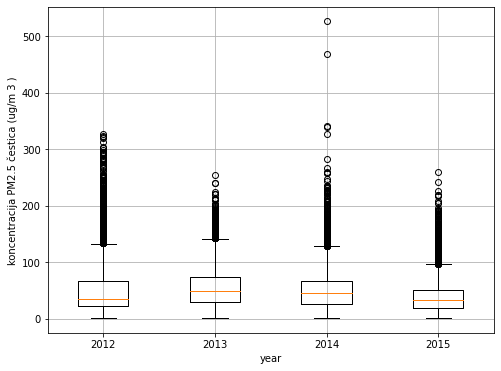

In [ ]:
# na sledećem boxplotu mogu se videti stanja PM2.5 čestica kroz 4 godine
plt.figure(figsize=(8, 6))
plt.boxplot([data_year.loc['2012','PM_US Post'],data_year.loc['2013','PM_US Post'],data_year.loc['2014','PM_US Post'],data_year.loc['2015','PM_US Post']])
plt.ylabel('koncentracija PM2.5 čestica (ug/m 3 )')
plt.xlabel('year')
plt.xticks([1,2,3,4],["2012","2013","2014","2015"])
plt.grid()
#na grafikonu može se uočiti da se u 2014. godini javljaju najveće vrednosti za koncentraciju PM2.5  čestica. Najveća vrednost koja se pojavljuje je 526.
#Po standardima vrednsoti koje su oko 500 predstavljaju ozbiljan rizik od respiratornih efekata u opštoj populaciji
#Može se uočiti da je u 2015. godini naglo opalo pojavljivanje velikih koncentracija što može ukazivati da su se standardi poboljšali i da se u gradu
#utiče na očuvanje zdravlja ljudi i sredine.
#Takođe vidi se da je se u 2013. godini nisu javljale ekstremne vrednosti u toku jednog sata, ali takođe se može uočiti da su se češće javljale veće 
#koncentracije nego što je to slučaj u narednoj godini. 

In [ ]:
#ovde može da se uoči koji meseci pripadaju kojoj sezoni
gb_month=data.groupby(by='month').mean()
gb_month
#sezone
#1 je prolece, 2 je leto, 3 je jesen, 4 je zima

,year,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
month,,,,,,,,,,,,
1,2013.50,16.00,11.50,4.00,67.01,7.70,72.69,1012.88,13.15,9.18,0.05,0.50
2,2013.49,14.63,11.50,4.00,48.64,11.06,77.42,1010.06,15.33,8.45,0.06,0.21
3,2013.50,16.00,11.50,1.00,44.96,15.00,82.91,1008.24,18.34,6.95,0.18,0.73
4,2013.50,15.50,11.50,1.00,66.82,18.87,83.61,1004.41,22.12,9.28,0.33,1.24
5,2013.50,16.00,11.50,1.00,48.16,22.97,85.75,1000.11,25.75,6.72,0.65,2.55
6,2013.50,15.50,11.50,2.00,36.30,24.24,81.65,996.38,27.98,8.41,0.38,1.05
7,2013.50,16.00,11.50,2.00,25.84,24.14,80.52,997.03,28.15,8.15,0.37,1.20
8,2013.50,16.00,11.50,2.00,38.88,24.07,81.21,997.12,27.98,5.69,0.48,2.03
9,2013.50,15.50,11.50,3.00,40.43,22.41,78.51,1001.39,26.86,6.39,0.18,0.74


In [ ]:
#prvo cu analizirati stanje po sezonama, zato ću postaviti sezone kao imena vrsta
data_season=data.set_index('season')
data_season

,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
season,,,,,,,,,,,,,
4.00,2012,1,1,0,84.00,9.10,73.00,1015.50,13.90,NE,9.40,0.00,0.00
4.00,2012,1,1,1,81.00,9.10,74.00,1015.40,13.60,NE,12.40,0.00,0.00
4.00,2012,1,1,2,72.00,8.90,79.00,1015.40,12.40,NE,16.60,0.00,0.00
4.00,2012,1,1,3,80.00,8.40,79.00,1015.50,11.90,NE,18.00,0.00,0.00
4.00,2012,1,1,4,69.00,8.10,81.00,1015.30,11.20,NE,20.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.00,2015,12,31,18,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
4.00,2015,12,31,19,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
4.00,2015,12,31,20,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00


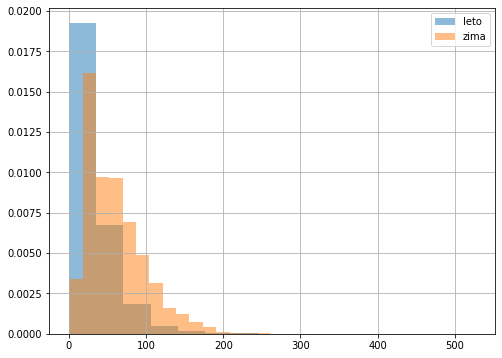

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data_season.loc[2,'PM_US Post'],alpha=0.5, bins=15,density=True, label='leto')
plt.hist(data_season.loc[4,'PM_US Post'],alpha=0.5, bins=15,density=True, label='zima')
plt.grid()
plt.legend()

In [ ]:
#sada analiziram stanje PM2.5 čestica u odnosu na mesece
data_month=data.set_index('month')
data_month

,year,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
month,,,,,,,,,,,,,
1,2012,1,0,4.00,84.00,9.10,73.00,1015.50,13.90,NE,9.40,0.00,0.00
1,2012,1,1,4.00,81.00,9.10,74.00,1015.40,13.60,NE,12.40,0.00,0.00
1,2012,1,2,4.00,72.00,8.90,79.00,1015.40,12.40,NE,16.60,0.00,0.00
1,2012,1,3,4.00,80.00,8.40,79.00,1015.50,11.90,NE,18.00,0.00,0.00
1,2012,1,4,4.00,69.00,8.10,81.00,1015.30,11.20,NE,20.40,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2015,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,NW,9.50,0.00,0.00
12,2015,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,NW,10.90,0.00,0.00
12,2015,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,NW,12.90,0.00,0.00


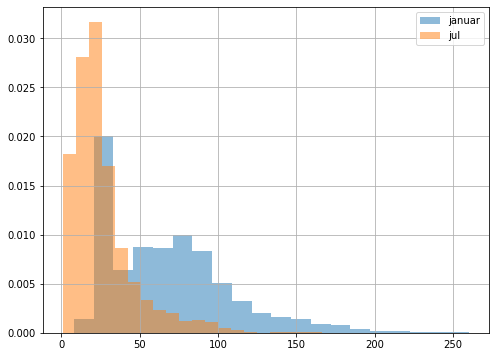

In [ ]:
# histogram koji pokazuje zavisnost letnjeg meseca i zimskog u odnosu na koncentraciju PM2.5 čestica
plt.figure(figsize=(8,6))
plt.hist(data_month.loc[1,'PM_US Post'],alpha=0.5, bins=20,density=True, label='januar')
plt.hist(data_month.loc[7,'PM_US Post'],alpha=0.5, bins=20,density=True, label='jul')
plt.grid()
plt.legend()
#Može se uočiti da se tokom jula, kao srednišnjem mesecu tokom leta, češće pojavljuju niže koncentracije PM2.5 čestica. To je potpuno u skaldu sa činjenicom da 
#je tokom januara, kao jednog od hladnijih meseci, neophodno grejanje stanovnika pri čemu nastaju velike količine PM2.5 čestica

In [ ]:
#ovo ću iskoristiti kako bi izanalizirala kretanje koncentracije PM čestica i temperature kroz mesece za pojedine godine
gb_year_month=data.groupby(by=['year','month']).mean()
gb_year_month

day  hour  season  PM_US Post  ...  TEMP   Iws  precipitation  Iprec
year month                                  ...                                  
2012 1     16.00 11.50    4.00       28.41  ... 11.54 11.42           0.10   0.67
     2     15.00 11.50    4.00       22.00  ... 14.12 10.85           0.11   0.41
     3     16.00 11.50    1.00       12.93  ... 18.06 10.18           0.09   0.17
     4     15.50 11.50    1.00       98.55  ... 23.17  8.14           0.51   2.01
     5     16.00 11.50    1.00       78.51  ... 26.82  5.77           0.40   1.04
     6     15.50 11.50    2.00       35.55  ... 27.70 10.44           0.42   1.45
     7     16.00 11.50    2.00       29.58  ... 28.16 11.05           0.19   0.91
     8     16.00 11.50    2.00       55.33  ... 28.22  4.87           0.25   0.81
     9     15.50 11.50    3.00       44.90  ... 26.19  7.85           0.10   0.23
     10    16.00 11.50    3.00       71.95  ... 23.45  5.04           0.06   0.24
     11    15.50 11.50    3.00       48.90  ... 19.29  6.40           0.24   1.75
     12    16.00 11.50    4.00       71.09  ... 14.69 12.01           0.06   0.26
2013 1     16.00 11.50    4.00       83.08  ... 13.58  7.45           0.01   0.01
     2     14.50 11.50    4.00       58.12  ... 17.51  7.17           0.01   0.03
     3     16.00 11.50    1.00       68.47  ... 19.38  5.40           0.23   0.84
     4     15.50 11.50    1.00       69.83  ... 20.73  5.60           0.39   1.40
     5     16.00 11.50    1.00       41.18  ... 25.39  7.32           0.40   1.27
     6     15.50 11.50    2.00       24.90  ... 27.60 11.31           0.32   1.00
     7     16.00 11.50    2.00       24.79  ... 27.40  6.32           0.43   1.30
     8     16.00 11.50    2.00       42.74  ... 27.53  8.15           0.53   2.28
     9     15.50 11.50    3.00       47.16  ... 26.56  7.04           0.32   1.74
     10    16.00 11.50    3.00       69.32  ... 23.12  9.28           0.01   0.02
     11    15.50 11.50    3.00       56.19  ... 19.22  9.81           0.05   0.36
     12    16.01 11.53    4.00       74.81  ... 12.19 11.68           0.14   1.73
2014 1     16.00 11.50    4.00       86.34  ... 13.47  9.38           0.00   0.00
     2     14.50 11.50    4.00       48.05  ... 13.25  8.44           0.05   0.22
     3     16.00 11.50    1.00       57.55  ... 17.41  5.31           0.37   1.71
     4     15.50 11.50    1.00       58.95  ... 22.66  4.59           0.26   0.74
     5     16.00 11.50    1.00       43.66  ... 24.86  5.33           0.72   3.38
     6     15.50 11.50    2.00       66.74  ... 28.25  5.07           0.42   1.10
     7     16.00 11.50    2.00       26.03  ... 28.91  4.58           0.27   0.95
     8     16.00 11.50    2.00       25.61  ... 28.16  4.23           0.69   3.29
     9     15.50 11.50    3.00       32.21  ... 27.63  5.22           0.13   0.31
     10    16.00 11.50    3.00       55.02  ... 24.23  5.65           0.00   0.00
     11    15.50 11.50    3.00       53.61  ... 20.23  5.59           0.05   0.28
     12    16.00 11.50    4.00       61.27  ... 12.94  9.78           0.08   0.32
2015 1     16.00 11.50    4.00       70.19  ... 14.01  8.45           0.08   1.32
     2     14.50 11.50    4.00       67.36  ... 16.49  7.25           0.06   0.16
     3     16.00 11.50    1.00       40.88  ... 18.50  6.93           0.04   0.20
     4     15.50 11.50    1.00       39.95  ... 21.94 18.78           0.16   0.82
     5     16.00 11.50    1.00       29.28  ... 25.93  8.48           1.08   4.50
     6     15.50 11.50    2.00       18.03  ... 28.37  6.84           0.35   0.68
     7     16.00 11.50    2.00       22.95  ... 28.15 10.64           0.59   1.65
     8     16.00 11.50    2.00       31.86  ... 28.02  5.51           0.46   1.73
     9     15.50 11.50    3.00       37.46  ... 27.06  5.44           0.16   0.69
     10    16.00 11.50    3.00       42.26  ... 23.72  9.78           0.17   2.07
     11    15.50 11.50    3.00       35.57  ... 21.14  7.78           0.06   

In [ ]:
month_2012_PM=gb_year_month.loc[2012]['PM_US Post']
month_2013_PM=gb_year_month.loc[2013]['PM_US Post']
month_2014_PM=gb_year_month.loc[2014]['PM_US Post']
month_2015_PM=gb_year_month.loc[2015]['PM_US Post']

month_2012_TEMP=gb_year_month.loc[2012]['TEMP']
month_2013_TEMP=gb_year_month.loc[2013]['TEMP']
month_2014_TEMP=gb_year_month.loc[2014]['TEMP']
month_2015_TEMP=gb_year_month.loc[2015]['TEMP']

month_2012_DEWP=gb_year_month.loc[2012]['DEWP']
month_2013_DEWP=gb_year_month.loc[2013]['DEWP']
month_2014_DEWP=gb_year_month.loc[2014]['DEWP']
month_2015_DEWP=gb_year_month.loc[2015]['DEWP']

month_2012_PRES=gb_year_month.loc[2012]['PRES']
month_2013_PRES=gb_year_month.loc[2013]['PRES']
month_2014_PRES=gb_year_month.loc[2014]['PRES']
month_2015_PRES=gb_year_month.loc[2015]['PRES']

month_2012_HUMI=gb_year_month.loc[2012]['HUMI']
month_2013_HUMI=gb_year_month.loc[2013]['HUMI']
month_2014_HUMI=gb_year_month.loc[2014]['HUMI']
month_2015_HUMI=gb_year_month.loc[2015]['HUMI']

month_2012_precipitation=gb_year_month.loc[2012]['precipitation']
month_2013_precipitation=gb_year_month.loc[2013]['precipitation']
month_2014_precipitation=gb_year_month.loc[2014]['precipitation']
month_2015_precipitation=gb_year_month.loc[2015]['precipitation']

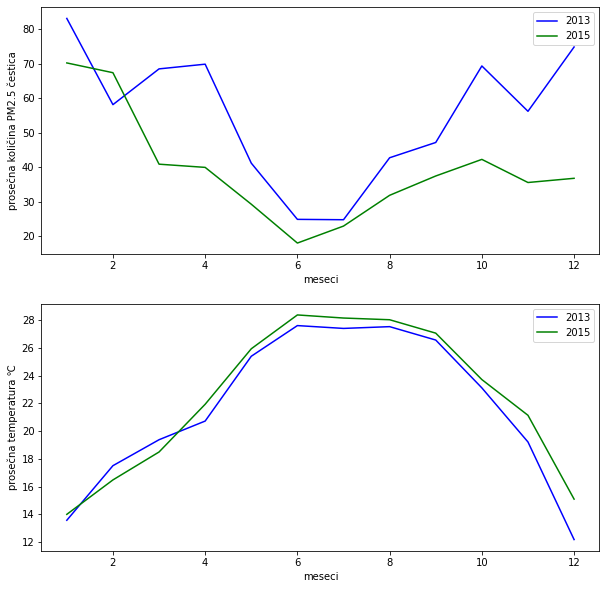

In [ ]:
#porednjenje dve godine, na jednom prozoru promena koncentracije PM2.5 čestica po mesecima dok na drugom promena tempereature
#da vidim da li temperatura utice na koncentraciju pm 2.5 cestica
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(np.arange(1,13,1),month_2013_PM, 'b',label="2013")
plt.plot(np.arange(1,13,1),month_2015_PM,'g',label="2015")
plt.xlabel('meseci')
plt.ylabel('prosečna količina PM2.5 čestica')
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(1,13,1),month_2013_TEMP, 'b',label="2013")
plt.plot(np.arange(1,13,1),month_2015_TEMP,'g',label="2015")
plt.xlabel('meseci')
plt.ylabel('prosečna temperatura ℃')
plt.legend()
#kada su veće temperature koncentracija PM2.5 čestica je manja
#Može se uočiti je promena ova dva obeležja tokom 2013. i 2015. godine veoma slična. Vidi se da su najveće zabeležene
#temperature tekom juna, jula i avgusta, i tada koncentracija PM2.5 čestica bude najmanja. Dok prilikom pada temperature
#koncentracija raste, što je u skladu sa prethodnim grafikonom. Može se uočiti da su najhladniji meseci decembar,januar i
#februar.

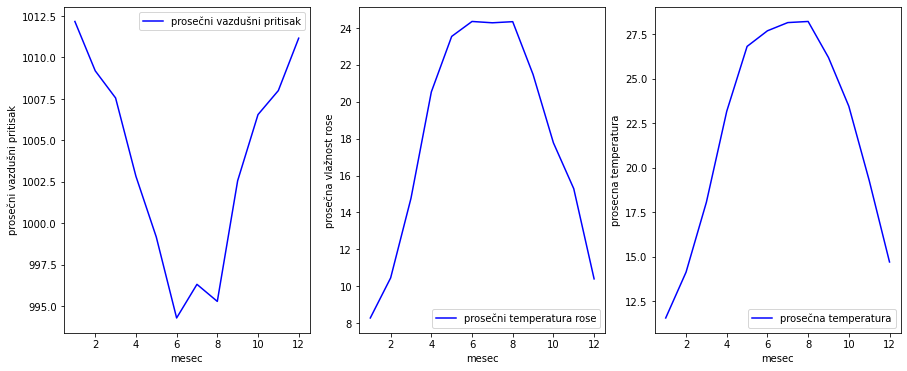

In [ ]:
data_groupby_month=data.groupby(by='month').mean()
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(np.arange(1,13,1),month_2012_PRES, 'b',label="prosečni vazdušni pritisak")
plt.xlabel('mesec')
plt.ylabel('prosečni vazdušni pritisak')
plt.legend()
plt.subplot(1,3,2)
plt.plot(np.arange(1,13,1),month_2012_DEWP, 'b',label="prosečni temperatura rose")
plt.xlabel('mesec')
plt.ylabel('prosečna vlažnost rose')
plt.legend()
plt.subplot(1,3,3)
plt.plot(np.arange(1,13,1),month_2012_TEMP, 'b',label="prosečna temperatura")
plt.xlabel('mesec')
plt.ylabel('prosecna temperatura')
plt.legend()

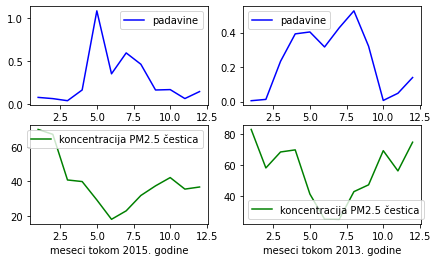

In [ ]:
plt.figure(figsize=(7,4))
plt.subplot(2,2,1)
plt.plot(np.arange(1,13,1),month_2015_precipitation, 'b',label="padavine")
plt.xlabel('meseci tokom 2015. godine')
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.arange(1,13,1),month_2013_precipitation, 'b',label="padavine")
plt.xlabel('meseci tokom 2013. godine')
plt.legend()
plt.subplot(2,2,3)
plt.plot(np.arange(1,13,1),month_2015_PM,'g',label="koncentracija PM2.5 čestica")
plt.xlabel('meseci tokom 2015. godine')
plt.legend()
plt.subplot(2,2,4)
plt.plot(np.arange(1,13,1),month_2013_PM, 'g',label="koncentracija PM2.5 čestica")
plt.xlabel('meseci tokom 2013. godine')
plt.legend()

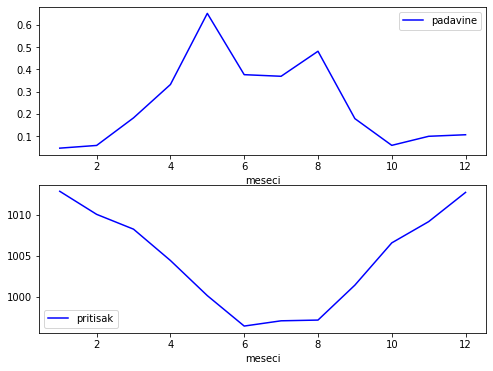

In [ ]:
#ispitivanje da li vlažnost zavisi od priska
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(np.arange(1,13,1),gb_month['precipitation'], 'b',label="padavine")
plt.xlabel('meseci')
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(1,13,1),gb_month['PRES'], 'b',label="pritisak")
plt.xlabel('meseci')
plt.legend()
#ovde se vidi povezanost između padavina i vrednosti pritiska, kada je pritisak manji vreme je lošije

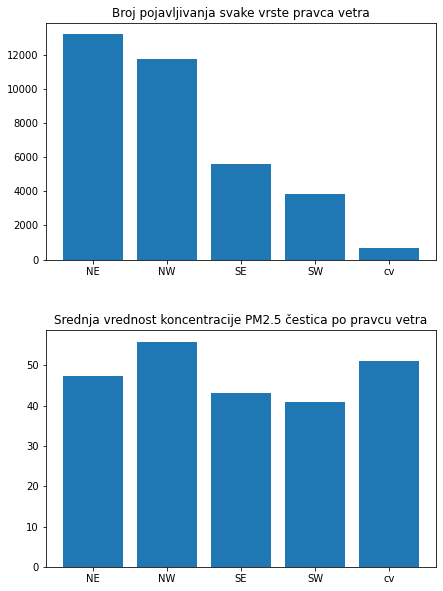

In [ ]:
pravac_vetra1 = data[['cbwd', 'PM_US Post']].groupby('cbwd').count().round(2)
pravac_vetra2 = data[['cbwd', 'PM_US Post']].groupby('cbwd').mean().round(2)
#fig, axes = plt.subplots(nrows=4, ncols=4)
#fig.tight_layout()

plt.figure(figsize=(7,10))
plt.tight_layout()
plt.subplots_adjust(hspace = .3)
plt.subplot(2,1,1)
plt.bar(pravac_vetra1.index, height=pravac_vetra1['PM_US Post'])
plt.title('Broj pojavljivanja svake vrste pravca vetra');
plt.subplot(2,1,2)
plt.bar(pravac_vetra2.index, height=pravac_vetra2['PM_US Post'])
plt.title('Srednja vrednost koncentracije PM2.5 čestica po pravcu vetra');


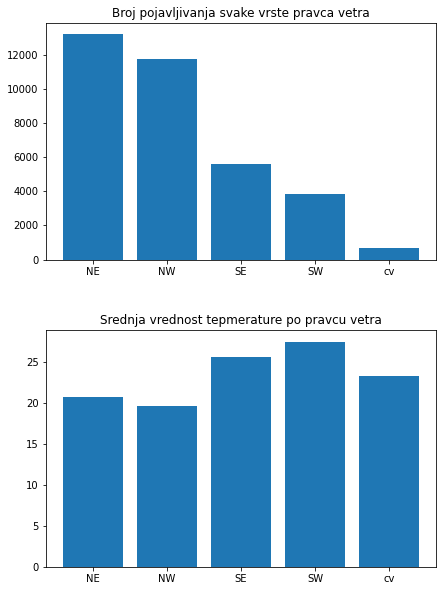

In [ ]:
pravac_vetra1 = data[['cbwd', 'TEMP']].groupby('cbwd').count().round(2)
pravac_vetra2 = data[['cbwd', 'TEMP']].groupby('cbwd').mean().round(2)
#fig, axes = plt.subplots(nrows=4, ncols=4)
#fig.tight_layout()

plt.figure(figsize=(7,10))
plt.tight_layout()
plt.subplots_adjust(hspace = .3)
plt.subplot(2,1,1)
plt.bar(pravac_vetra1.index, height=pravac_vetra1['TEMP'])
plt.title('Broj pojavljivanja svake vrste pravca vetra');
plt.subplot(2,1,2)
plt.bar(pravac_vetra2.index, height=pravac_vetra2['TEMP'])
plt.title('Srednja vrednost tepmerature po pravcu vetra');
#moguće je uočiti da mali vremenski period grad Guangyhou bude bez vetrova. Vidi se da su u velikoj prednosti severo-istočni i severo-zapadni vetrovi,
#dok se u značajnije manjoj količini javljaju jugo-zapadni i jugo-istočni vetrovi. Takođe na drugom po redu histogramu 
#vidi se da je tokom pojavljivanja jugo-zapadnih i jugo-istočnih vetrova temperatura veća u odnosu na severne vetrove i kada je vreme bez vetrova.

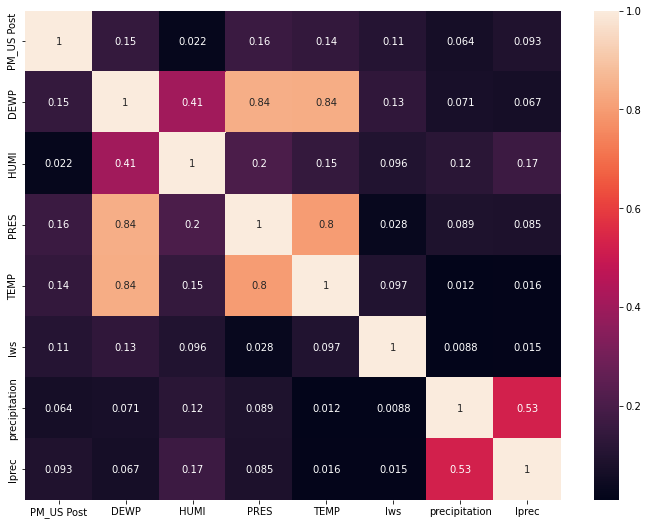

In [ ]:
data_without_some_columns=data.drop(['year','month','day','hour','season'], axis=1)
corr = data_without_some_columns.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);
#Moze se  uociti velika korelisanost izmedju obelezja DEWP i PRES, DEWP i TEMP
#Moze se  uociti velika korelisanost izmedju obelezja TEMP i PRES

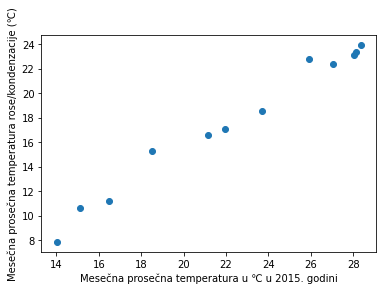

In [ ]:
#na ovom grafikonu sam uzela da jednu godinu radi preglednije slike
plt.figure()
plt.scatter(month_2015_TEMP,month_2015_DEWP)
plt.xlabel('Mesečna prosečna temperatura u ℃ u 2015. godini');
plt.ylabel('Mesečna prosečna temperatura rose/kondenzacije (℃)');
#pozitivna korelacija


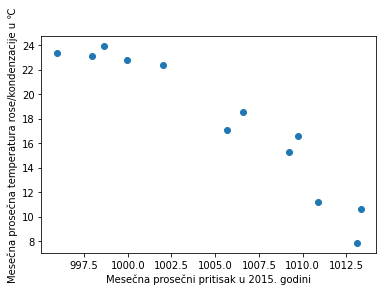

In [ ]:
#na sledećem scatter plotu možemo primetiti negativnu korelaciju između obeležja DEWP i PRES
plt.scatter(month_2015_PRES,month_2015_DEWP)
plt.xlabel('Mesečna prosečni pritisak u 2015. godini');
plt.ylabel('Mesečna prosečna temperatura rose/kondenzacije u ℃');

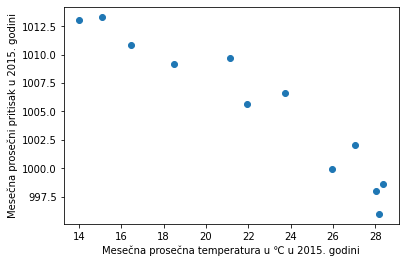

In [ ]:
plt.scatter(month_2015_TEMP,month_2015_PRES)
plt.xlabel('Mesečna prosečna temperatura u ℃ u 2015. godini');
plt.ylabel('Mesečna prosečni pritisak u 2015. godini');
#ovde se uočava negativna korelacija

In [ ]:
data=data_with_dummy_variables
data

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
0,2012,1,1,0,4.00,84.00,9.10,73.00,1015.50,13.90,9.40,0.00,0.00,1,0,0,0
1,2012,1,1,1,4.00,81.00,9.10,74.00,1015.40,13.60,12.40,0.00,0.00,1,0,0,0
2,2012,1,1,2,4.00,72.00,8.90,79.00,1015.40,12.40,16.60,0.00,0.00,1,0,0,0
3,2012,1,1,3,4.00,80.00,8.40,79.00,1015.50,11.90,18.00,0.00,0.00,1,0,0,0
4,2012,1,1,4,4.00,69.00,8.10,81.00,1015.30,11.20,20.40,0.00,0.00,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2015,12,31,18,4.00,52.00,10.10,68.00,1017.70,16.00,9.50,0.00,0.00,0,1,0,0
35059,2015,12,31,19,4.00,59.00,11.00,80.00,1018.30,14.40,10.90,0.00,0.00,0,1,0,0
35060,2015,12,31,20,4.00,58.00,11.40,82.00,1018.70,14.50,12.90,0.00,0.00,0,1,0,0
35061,2015,12,31,21,4.00,60.00,11.10,78.00,1019.30,14.90,14.70,0.00,0.00,0,1,0,0


**Regresija**

In [ ]:
#sada razdvajam obeleja koja ce da se nalaze u trening skupu od onih koja predvidjam
x=data.drop('PM_US Post', axis=1)
y=data['PM_US Post']
print(x.shape)
print(x.columns)
x.head()

(35059, 16)
Index(['year', 'month', 'day', 'hour', 'season', 'DEWP', 'HUMI', 'PRES',
       'TEMP', 'Iws', 'precipitation', 'Iprec', 'cbwd_NE', 'cbwd_NW',
       'cbwd_SE', 'cbwd_SW'],
      dtype='object')


,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
0,2012,1,1,0,4.00,9.10,73.00,1015.50,13.90,9.40,0.00,0.00,1,0,0,0
1,2012,1,1,1,4.00,9.10,74.00,1015.40,13.60,12.40,0.00,0.00,1,0,0,0
2,2012,1,1,2,4.00,8.90,79.00,1015.40,12.40,16.60,0.00,0.00,1,0,0,0
3,2012,1,1,3,4.00,8.40,79.00,1015.50,11.90,18.00,0.00,0.00,1,0,0,0
4,2012,1,1,4,4.00,8.10,81.00,1015.30,11.20,20.40,0.00,0.00,1,0,0,0


In [ ]:
x.describe()

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
count,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00,35059.00
mean,2013.50,6.52,15.73,11.50,2.49,17.62,78.58,1004.65,21.94,7.86,0.25,1.04,0.38,0.33,0.16,0.11
std,1.12,3.45,8.80,6.92,1.12,7.09,16.42,6.88,6.71,11.79,1.87,5.95,0.48,0.47,0.37,0.31
min,2012.00,1.00,1.00,0.00,1.00,-11.70,13.00,975.00,1.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2012.00,4.00,8.00,6.00,1.00,12.80,68.00,999.30,17.30,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2013.00,7.00,16.00,12.00,2.00,19.50,83.00,1004.60,23.40,4.10,0.00,0.00,0.00,0.00,0.00,0.00
75%,2014.00,10.00,23.00,17.50,3.00,23.70,92.00,1009.90,26.70,9.00,0.00,0.00,1.00,1.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,4.00,27.40,100.00,1023.10,37.40,206.60,90.40,126.00,1.00,1.00,1.00,1.00


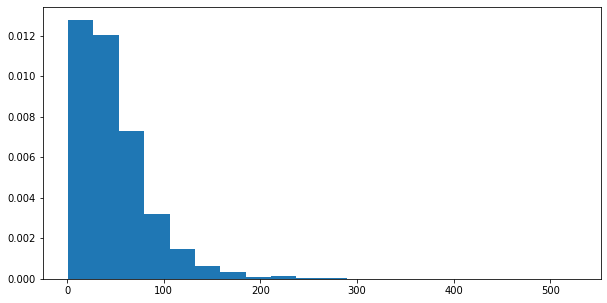

In [ ]:
#analiza ponašanja koncentracije PM2.5 čestica
plt.figure(figsize=(10,5))
plt.hist(y, density=True, bins=20)
plt.show()

In [ ]:
#funkcija koja racuna razlicite mere uspesnosti regresora
def model_evaluation(y, y_predicted, N, d):#N je broj uzoraka dostupnih za analizu, a d je broj obelezja u trening skupu
    mse = mean_squared_error(y_test, y_predicted) 
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    #izlistavanje mera uspešnosti regresora
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [ ]:
# podela skupa na trening i test podatke, u terning skup neophodno je smestiti 90% uzoraka
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Mean squared error:  1229.8911532101158
Mean absolute error:  24.835841348420814
Root mean squared error:  35.06980400872118
R2 score:  0.06417398462580426
R2 adjusted score:  0.06369918705331612
        y  y_pred
0   11.00   29.32
1   22.00   39.27
2   26.00   55.19
3   22.00   63.08
4   66.00   49.37
5   32.00   46.87
6   84.00   45.40
7   21.00   50.31
8   50.00   51.03
9   61.00   44.33
10  51.00   40.53
11 103.00   68.31
12   5.00   45.77
13  36.00   32.89
14  48.00   36.82
15  19.00   47.59
16  55.00   57.62
17  22.00   57.12
18  46.00   47.65
19  40.00   54.82


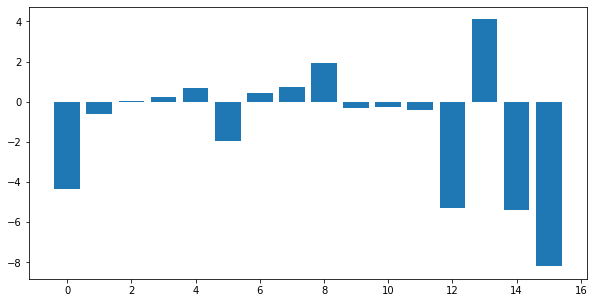

koeficijenti:  [-4.33307587 -0.61254179  0.03744927  0.22603826  0.65721163 -1.96972752
  0.43917397  0.71199218  1.9417921  -0.31884025 -0.28567404 -0.39936594
 -5.29679503  4.09955631 -5.4183582  -8.20438721]


In [ ]:
 #Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)#fit_intercept govori da li zelimo da postoji slobodan clan

first_regression_model.fit(x_train, y_train)

y_predicted = first_regression_model.predict(x_test)

model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)
#ovde se vidi da se gresi sa nekom apsolutnom gresnokm od 24.8
#takodje gledajuci r2 score, takodje vidimo da je vrednost daleko od 1, sto znaci da se pravi velika greska
#zato treba pokusati modifikovati model, pocetnu hipotezu
#npr da razmislim da li su mi sva obelezja potrebna, mozda neka obelezja uopste ne uticu na obelezje koje je predmet predvidjanja
#sto vise obelezja to je model kompleksniji

In [ ]:
# Selekcija obelezja unazad
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()
#npr ako se uzme da je moja granica pristanka 1% i onda gde god je verovatnoca manja od 0.01 onda to obelezje treba da se zadrzi
# onda mogu izbaciti obelezja cbwd i day
#ako se izbace ova obelezja ne dobijaju se bolji rezulatati
#ako se izbace neka obelezja dobro je opet odraditi ovaj postupak pa mozda bude mogucnost da se izbaci jos koje obelezje  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:09:39   Log-Likelihood:            -1.5707e+05
No. Observations:               31553   AIC:                         3.142e+05
Df Residuals:                   31536   BIC:                         3.143e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8020.3825    362.559     22.122      0.000    7309.752    8731.013
year             -4.3331      0.182    -23.791      0.000      -4.690      -3.976
month            -0.6125      0.065     -9.416      0.000      -0.740      -0.485
day               0.0374      0.023      1.661      0.097      -0.007       0.082
hour              0.2260      0.030      7.563      0.000       0.167       0.285
season            0.6572      0.234      2.813      0.005       0.199       1.115
DEWP             -1.9697      0.338     -5.823      0.000      -2.633      -1.307
HUMI              0.4392      0.082      5.334      0.000       0.278       0.601
PRES              0.7120      0.060     11.912      0.000       0.595       0.829
TEMP              1.9418      0.338      5.737      0.000       1.278       2.605
Iws              -0.3188      0.017    -18.491      0.000      -0.353      -0.285
precipitation    -0.2857      0.125     -2.277      0.023      -0.532      -0.040
Iprec            -0.3994      0.040    -10.080      0.000      -0.477      -0.322
cbwd_NE          -5.2968      1.460     -3.628      0.000      -8.158      -2.435
cbwd_NW           4.0996      1.464      2.801      0.005       1.231       6.968
cbwd_SE          -5.4184      1.507     -3.595      0.000      -8.372      -2.464
cbwd_SW          -8.2044      1.558     -5.268      0.000     -11.257      -5.152
==============================================================================
Omnibus:                    13820.539   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101289.228
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                      10.857   Cond. No.                     4.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#x=data.drop(['PM_US Post','month','cbwd'], axis=1)
x=data.drop(['PM_US Post','day','precipitation'], axis=1)
y=data['PM_US Post']
print(x.shape)
print(x.columns)
x.head()

(35059, 14)
Index(['year', 'month', 'hour', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP',
       'Iws', 'Iprec', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW'],
      dtype='object')


,year,month,hour,season,DEWP,HUMI,PRES,TEMP,Iws,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
0,2012,1,0,4.00,9.10,73.00,1015.50,13.90,9.40,0.00,1,0,0,0
1,2012,1,1,4.00,9.10,74.00,1015.40,13.60,12.40,0.00,1,0,0,0
2,2012,1,2,4.00,8.90,79.00,1015.40,12.40,16.60,0.00,1,0,0,0
3,2012,1,3,4.00,8.40,79.00,1015.50,11.90,18.00,0.00,1,0,0,0
4,2012,1,4,4.00,8.10,81.00,1015.30,11.20,20.40,0.00,1,0,0,0


In [ ]:
# podela skupa na trening i test podatke, u terning skup neophodno je smestiti 90% uzoraka
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Mean squared error:  1229.3752067633968
Mean absolute error:  24.830409716680606
Root mean squared error:  35.062447244358125
R2 score:  0.06456656904770142
R2 adjusted score:  0.06415132178936755
        y  y_pred
0   11.00   28.94
1   22.00   39.09
2   26.00   54.76
3   22.00   63.54
4   66.00   49.02
5   32.00   47.09
6   84.00   45.61
7   21.00   50.60
8   50.00   51.56
9   61.00   43.93
10  51.00   40.01
11 103.00   68.17
12   5.00   46.07
13  36.00   32.95
14  48.00   37.11
15  19.00   47.78
16  55.00   57.68
17  22.00   56.93
18  46.00   47.16
19  40.00   54.26


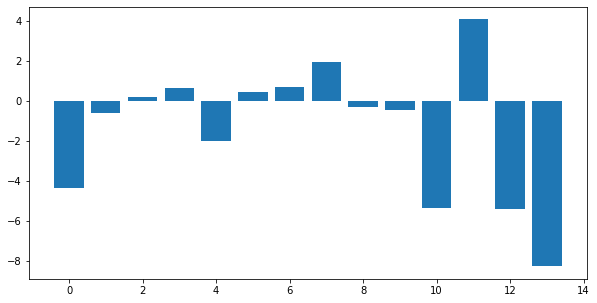

koeficijenti:  [-4.34342143 -0.61296963  0.22405181  0.66833958 -1.97746824  0.44105606
  0.72140549  1.95849515 -0.31823727 -0.44515063 -5.33287024  4.09113289
 -5.39639591 -8.26955294]


In [ ]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)#fit_intercept govori da li zelimo da postoji slobodan clan

first_regression_model.fit(x_train, y_train)

y_predicted = first_regression_model.predict(x_test)

model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)
#moze se uociti da se nisu promenile vresnoti za mere uspesnosti regresora
#sledece sto cu pokusati je neki od metor=da regularizacije

In [ ]:
# Standardizacija obelezja 
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,year,month,hour,season,DEWP,HUMI,PRES,TEMP,Iws,Iprec,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
0,1.34,-1.60,-0.50,1.35,-0.93,0.09,1.04,-1.12,-0.28,-0.17,1.28,-0.71,-0.44,-0.35
1,-0.45,-1.60,0.22,1.35,-1.17,-1.26,0.37,-0.63,0.30,-0.17,-0.78,1.41,-0.44,-0.35
2,-1.34,0.14,-0.79,-0.44,1.01,1.06,-1.05,0.53,-0.18,-0.17,1.28,-0.71,-0.44,-0.35
3,1.34,1.01,-0.07,0.46,0.48,-0.83,0.79,0.95,-0.28,-0.17,1.28,-0.71,-0.44,-0.35
4,0.45,1.30,-1.37,0.46,-0.92,-0.65,0.95,-0.72,-0.43,-0.17,-0.78,1.41,-0.44,-0.35


Mean squared error:  1229.3752067633964
Mean absolute error:  24.830409716680155
Root mean squared error:  35.06244724435812
R2 score:  0.06456656904770186
R2 adjusted score:  0.06415132178936811
        y  y_pred
0   11.00   28.94
1   22.00   39.09
2   26.00   54.76
3   22.00   63.54
4   66.00   49.02
5   32.00   47.09
6   84.00   45.61
7   21.00   50.60
8   50.00   51.56
9   61.00   43.93
10  51.00   40.01
11 103.00   68.17
12   5.00   46.07
13  36.00   32.95
14  48.00   37.11
15  19.00   47.78
16  55.00   57.68
17  22.00   56.93
18  46.00   47.16
19  40.00   54.26


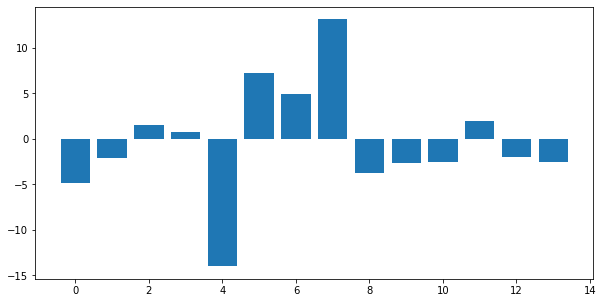

koeficijenti:  [ -4.85467189  -2.11383058   1.55289067   0.74647607 -14.02390935
   7.22724002   4.97065065  13.15375235  -3.79796012  -2.66534523
  -2.58533015   1.93005562  -1.98207444  -2.561826  ]


In [ ]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model_std = LinearRegression()

regression_model_std.fit(x_train_std, y_train)

y_predicted = regression_model_std.predict(x_test_std)

model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
plt.show()
print("koeficijenti: ", regression_model_std.coef_)
#nakon stanardizacije moze se videti da se podaci i dalje nisu izmenili


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10 x11', 'x10 x12', 'x10 x13', 'x11 x12', 'x11 x13', 'x12 x13']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Mean squared error:  1065.274968546911
Mean absolute error:  22.812558212350996
Root mean squared error:  32.63855034383284
R2 score:  0.1894306853975607
R2 adjusted score:  0.18672423397029403
        y  y_pred
0   11.00   37.00
1   22.00   20.48
2   26.00   82.59
3   22.00   74.12
4   66.00   49.08
5   32.00   45.77
6   84.00   39.13
7   21.00   40.85
8   50.00   68.34
9   61.00   33.57
10  51.00   45.67
11 103.00   75.20
12   5.00   37.79
13  36.00   26.87
14  48.00   36.13
15  19.00   56.07
16  55.00   60.32
17  22.00   31.11
18  46.00   42.23
19  40.00   36.86


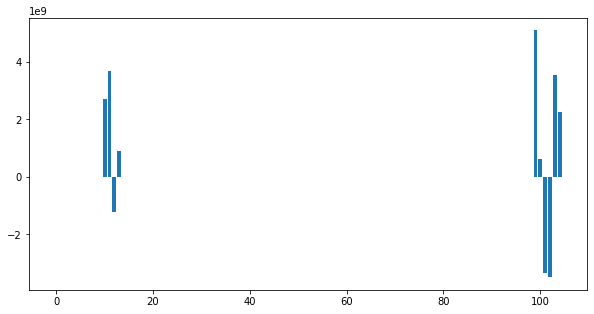

koeficijenti:  [-4.62218263e+00 -6.16803317e+00  4.69190504e-01  3.76202996e+00
  5.45815677e+01 -2.95497580e+01  1.05564825e+00 -5.31082746e+01
 -4.66847803e+00  1.06352804e+00  2.71971219e+09  3.67853752e+09
 -1.21806467e+09  8.96920018e+08 -7.23479764e+00  2.08320854e-01
  4.58656559e+00 -2.35637745e+00  1.40116412e+00 -8.69147121e-02
  2.06807560e+00 -8.66280923e-01  6.54799710e-02 -1.81404891e-01
  2.13168459e-01 -1.67103316e+00 -1.03954909e+00 -4.15928696e-01
  7.46481419e+00  2.38467752e+00 -2.67501244e+00 -3.20044246e+00
 -3.02741099e+00  3.03304136e-01  8.95339489e-01  4.70994622e-01
  1.93579137e-01  2.65788244e+00  5.73405027e-01  1.92912564e-01
  3.26609592e+01 -1.51310564e+01  8.36296305e-01 -2.77438731e+01
 -2.31749713e-01 -6.28195524e-01 -4.66067791e-01 -1.72210693e-01
 -1.46323228e+00 -1.21707416e+00 -1.46935534e+00  1.09544814e-01
  9.68500305e+00  4.93126303e-01 -1.04131520e+00 -1.97921288e+00
 -1.17287678e+00  4.42007363e-01 -1.43929207e+00 -7.58720636e-01
  8.062296

In [ ]:
#kako bi pokusalo da se poboljsa model regresije za predvidjanje pravi se model koji ce za hipotzu ukljuciti i interakcije izmejdu obelezja
#po defalut-u uzima drugi stepen
#ovde su samo interakcije zastupljene
#PolynomialFeatures ce automacki da napravi slobodan clan,include_bias=False, ovim se sprecava kreiranje slobodnog clana
#vec postoji slobodan clan posto kalsa linearRegresion vec sama napravi slobodan clan
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names())

regression_model_inter = LinearRegression()

regression_model_inter.fit(x_inter_train, y_train)

y_predicted = regression_model_inter.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)
#ovde moze da se primeti da su resenje dosta bolja, ali i dalje nisu dobra
#svakao dodavanje interakcija je pomoglo u izvesnoj meri

Mean squared error:  1066.2992032314057
Mean absolute error:  22.816785476385547
Root mean squared error:  32.654237140552
R2 score:  0.1886513436963888
R2 adjusted score:  0.1859422900851737
        y  y_pred
0   11.00   36.42
1   22.00   20.62
2   26.00   82.33
3   22.00   74.15
4   66.00   49.23
5   32.00   45.96
6   84.00   39.51
7   21.00   40.63
8   50.00   68.81
9   61.00   33.76
10  51.00   46.03
11 103.00   75.91
12   5.00   36.78
13  36.00   27.06
14  48.00   36.24
15  19.00   55.61
16  55.00   60.90
17  22.00   31.48
18  46.00   43.11
19  40.00   36.30


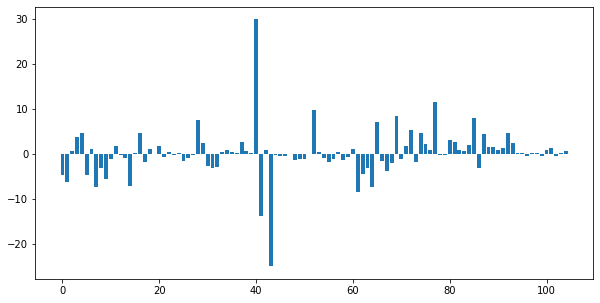

koeficijenti:  [-4.79101292e+00 -6.23154872e+00  5.38666219e-01  3.78081552e+00
  4.56157648e+00 -4.76071259e+00  1.04798291e+00 -7.42740582e+00
 -3.27691973e+00 -5.67749518e+00 -1.10055811e+00  1.64534054e+00
 -2.83847241e-01 -1.02255580e+00 -7.21062238e+00  2.02683296e-01
  4.59056370e+00 -1.93305645e+00  1.11435240e+00 -1.04693235e-01
  1.63908010e+00 -8.59061778e-01  2.63772208e-01 -2.12121393e-01
  1.87496837e-01 -1.69043201e+00 -1.05412900e+00 -4.15392217e-01
  7.45591339e+00  2.35329642e+00 -2.68951964e+00 -3.22506955e+00
 -3.06732279e+00  3.05048967e-01  8.45452954e-01  3.10281987e-01
  1.81637951e-02  2.54287826e+00  4.72375095e-01  1.91167842e-01
  2.98154172e+01 -1.37858401e+01  8.50576463e-01 -2.50752130e+01
 -2.12074248e-01 -6.09329938e-01 -4.50836472e-01 -1.58506499e-01
 -1.44722863e+00 -1.20817107e+00 -1.22139598e+00 -1.01667069e-01
  9.61010769e+00  2.44417012e-01 -1.05399732e+00 -1.96535754e+00
 -1.22706400e+00  4.00611349e-01 -1.49730399e+00 -8.15383546e-01
  9.955811

In [ ]:
#u prethodnom koraku se vidi da su težinski koeficijenti veoma neravnomerno raspoređeneni
#stoga će se primeniti Ridge mera regularizacije
#kako bi se težinski koeficijenti ravnomerno rasporedili
#primena regularizacije, Ridge, kako bi se sprečilo postojanje dominantnih obeležja

ridge_model = Ridge(alpha=5)#alpha je stemen kaznjavanja odstupanja

ridge_model.fit(x_inter_train, y_train)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)
#sada su tezine dosta poboljsane
#ovo je bolji model zato sto nema dominantnog

Mean squared error:  1022.0583813152846
Mean absolute error:  22.23273631841097
Root mean squared error:  31.969647813438367
R2 score:  0.22231425116798198
R2 adjusted score:  0.2193700649906839
        y  y_pred
0   11.00   33.79
1   22.00   15.41
2   26.00   79.79
3   22.00   65.65
4   66.00   55.57
5   32.00   38.50
6   84.00   42.65
7   21.00   47.52
8   50.00   66.94
9   61.00   34.57
10  51.00   41.89
11 103.00   77.57
12   5.00   42.96
13  36.00   16.81
14  48.00   23.07
15  19.00   53.47
16  55.00   61.60
17  22.00   36.35
18  46.00   39.78
19  40.00   53.64


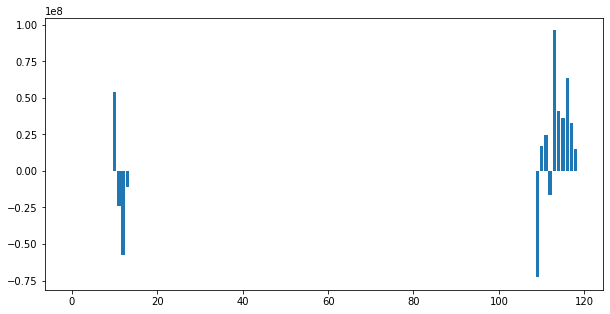

koeficijenti:  [-4.96465657e+00  1.85163749e+00  1.90115884e-01 -4.08524327e+00
 -1.11187638e+02  5.06377424e+01 -3.60247635e-01  1.04271122e+02
 -5.68993069e+00 -2.48368495e+00  5.39059845e+07 -2.37206053e+07
 -5.76497922e+07 -1.07841863e+07 -5.17456405e+00 -7.54460075e+00
  2.09065305e-01  4.64883341e+00 -6.53936471e+00  3.33224359e+00
 -6.37040881e-02  6.04177692e+00 -1.07854340e+00 -6.57022265e-01
 -4.75812539e-01  4.59991029e-01 -1.55774155e+00 -1.04366933e+00
  1.04717208e+01 -2.58558844e-01  6.66770994e-01 -3.65180069e-01
 -9.34697926e-01 -2.90970581e+00 -3.51174965e-01 -7.03775305e-02
  3.84049266e-01  8.91988249e-02  3.97672959e-02  2.22173605e+00
  3.88404648e-01  1.41519912e+00  7.46128373e-02  1.81417666e+01
 -7.66594790e+00  8.07070356e-01 -1.48059594e+01 -2.14601415e-02
 -8.11276806e-01 -6.55202975e-01 -4.06307458e-01 -1.42771275e+00
 -1.18637694e+00  7.11369057e+00  3.33183202e+00 -9.51828118e-01
  8.33277915e+00 -1.46706193e+00 -1.03038913e-01 -1.78705902e+00
 -7.732161

In [ ]:
#ovde pokusavam da poboljsam situaciju tako sto u hipotezu dodam i kvadratne varijante obelezja,interaction_only=False,
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)


regression_model_degree = LinearRegression()

regression_model_degree.fit(x_inter_train, y_train)

y_predicted = regression_model_degree.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
plt.show()
print("koeficijenti: ", regression_model_degree.coef_)
#takodje se poboljsalo resenje ali minimalno
#problem koji ovde nastaje je da sada imamo neke prevelike tezine
#odnosno postoji opasnost nadprilagodjavanja

Mean squared error:  1022.509928356416
Mean absolute error:  22.227887727080763
Root mean squared error:  31.97670915457712
R2 score:  0.22197066834997958
R2 adjusted score:  0.2190251814264803
        y  y_pred
0   11.00   34.00
1   22.00   15.98
2   26.00   80.44
3   22.00   65.47
4   66.00   54.83
5   32.00   38.20
6   84.00   42.52
7   21.00   46.63
8   50.00   66.30
9   61.00   34.15
10  51.00   41.50
11 103.00   76.74
12   5.00   43.89
13  36.00   16.79
14  48.00   22.82
15  19.00   53.95
16  55.00   61.29
17  22.00   35.89
18  46.00   39.78
19  40.00   52.33


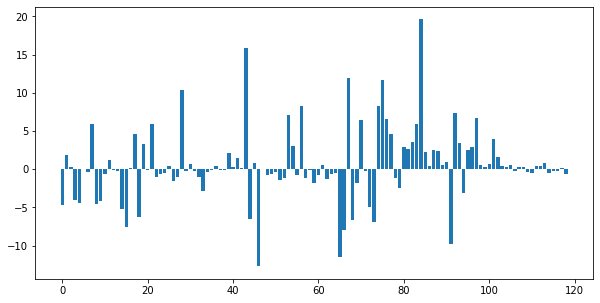

koeficijenti:  [-4.67982904e+00  1.89892004e+00  2.31439882e-01 -4.01083279e+00
 -4.41777207e+00  8.12613824e-02 -4.12466076e-01  5.95008748e+00
 -4.51506903e+00 -4.11028725e+00 -6.45584005e-01  1.21553760e+00
 -1.24928803e-01 -2.57224942e-01 -5.24613980e+00 -7.56885888e+00
  2.09004183e-01  4.65889515e+00 -6.31382420e+00  3.26317849e+00
 -7.98133591e-02  5.86178509e+00 -1.07757345e+00 -6.04913567e-01
 -5.02089523e-01  4.36014998e-01 -1.57999148e+00 -1.05722099e+00
  1.04237824e+01 -2.60574528e-01  7.00035998e-01 -2.45371876e-01
 -9.63548470e-01 -2.85976691e+00 -4.11475240e-01 -6.37909287e-02
  3.70729374e-01 -6.74918402e-02 -1.14756982e-01  2.10869247e+00
  3.05516343e-01  1.42687168e+00  9.24333535e-02  1.59226974e+01
 -6.54686697e+00  8.16815159e-01 -1.27420704e+01 -1.15943376e-02
 -8.15315230e-01 -6.68685743e-01 -4.17948136e-01 -1.43558655e+00
 -1.19289259e+00  7.13642893e+00  3.00672464e+00 -7.89921963e-01
  8.22086516e+00 -1.21028648e+00 -1.03520436e-01 -1.80473345e+00
 -8.072179

In [ ]:
#primena regularizacije, Ridge, kako bi se sprečilo postojanje dominantnih obeležja
# Inicijalizacija
ridge_model = Ridge(alpha=5)#alpha je stemen kaznjavanja odstupanja

ridge_model.fit(x_inter_train, y_train)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)
#sada su tezine dosta poboljsane
#ovo je bolji model zato sto nema dominantnog

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.008e+05, tolerance: 4.233e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Mean squared error:  1024.023572972002
Mean absolute error:  22.22812266046727
Root mean squared error:  32.000368325567784
R2 score:  0.22081893390128526
R2 adjusted score:  0.21786908670675253
        y  y_pred
0   11.00   34.13
1   22.00   17.94
2   26.00   80.43
3   22.00   65.08
4   66.00   53.73
5   32.00   38.20
6   84.00   42.35
7   21.00   45.69
8   50.00   66.77
9   61.00   33.90
10  51.00   41.71
11 103.00   76.79
12   5.00   43.78
13  36.00   17.38
14  48.00   22.99
15  19.00   53.01
16  55.00   61.56
17  22.00   36.10
18  46.00   42.72
19  40.00   48.83


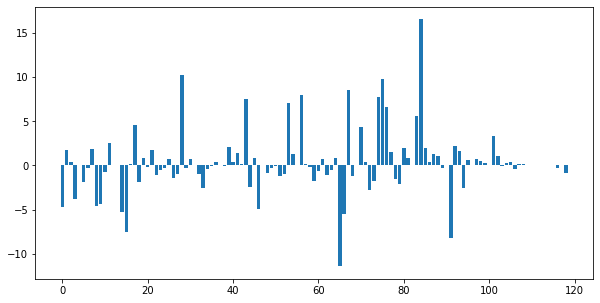

koeficijenti:  [ -4.70354682   1.71404846   0.42261503  -3.80533102   0.
  -1.91691271  -0.31225991   1.83049971  -4.54650994  -4.40984027
  -0.70775455   2.53476447  -0.          -0.          -5.26307409
  -7.56749676   0.17358735   4.59818892  -1.91293639   0.8496222
  -0.1163188    1.76530026  -1.03310249  -0.49960747  -0.25014299
   0.6826435   -1.4414433   -0.90913388  10.22396153  -0.25150225
   0.78962457  -0.          -0.97858395  -2.54824699  -0.42455048
  -0.01692726   0.34673939  -0.          -0.04205934   2.13235565
   0.39644174   1.36125169   0.13845326   7.54219376  -2.44194132
   0.8333659   -4.93525715  -0.          -0.81742248  -0.33180761
  -0.09968913  -1.17481695  -1.01007034   7.05853003   1.29989764
  -0.           8.00715255   0.1964186   -0.1405491   -1.77521131
  -0.58330588   0.6866602   -1.07432575  -0.50751968   0.87421369
 -11.44250997  -5.47178698   8.51673896  -1.2287207    0.
   4.40808503   0.37171198  -2.81299175  -1.76669579   7.72391447
   9.8225415

In [ ]:
#ovde se pokušava sa drugim načinom regularizacije, Lasso, koja u sebi sadrzi i selekciju
lasso_model = Lasso(alpha=0.01)

lasso_model.fit(x_inter_train, y_train)

y_predicted = lasso_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)
#ovde su takođe poboljšani težinski koeficijenti

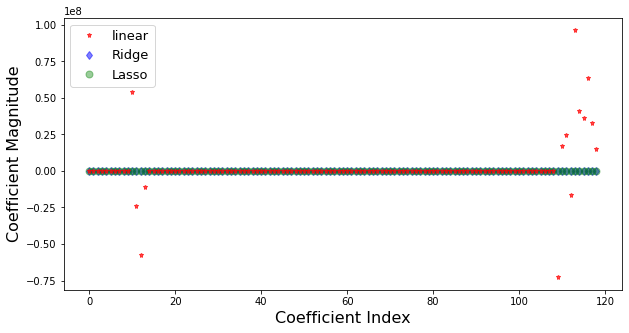

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7)
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') 
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()